In [27]:
import numpy as np
import pandas as pd
import time
import random
from typing import Callable
from matplotlib import pyplot as plt
from helper_functions import *

# testing instance

In [ ]:
#problem_instance = "inst_tuning\heur040_n_300_m_13358"
instance_type = "inst_tuning/" #"inst_competition/" #"inst_tuning/" # 
problem_instance = "heur041_n_300_m_17492" #"heur040_n_300_m_13358" #"heur001_n_10_m_31" 
path = "data/"+instance_type + problem_instance +".txt"

In [5]:
# Define parameter values for tuning
params_to_try = [
    {'equilibrium': 50, 'cooling': 0.75, "T_init": None, "stopping_criteria": "finalT", "T_fin_frac": 8, "tau": 10},
    {'equilibrium': 50, 'cooling': 0.5, "T_init": None, "stopping_criteria": "finalT", "T_fin_frac": 8, "tau": 10},
    {'equilibrium': 50, 'cooling': 0.5, "T_init": 13000, "stopping_criteria": "finalT", "T_fin_frac": 8, "tau": 10},
]

# Store outputs for different parameter combinations
outputs = []

for params in params_to_try:
    print("trying parameters\nequilibrium: ", params['equilibrium'], ", cooling: ", params["cooling"],
         ", T_init: ", params["T_init"], ", stopping_criteria: ", params["stopping_criteria"], 
          ", T_fin_frac: ", params["T_fin_frac"],", tau: ", params["tau"])
    start_time = time.time()
    sol, obj_traj, temp_traj, rej_traj = SA(inital_solution, 
                                            equilibrium = params['equilibrium'], 
                                            cooling = params['cooling'],
                                           T_init = params["T_init"],
                                           stopping_criteria = params["stopping_criteria"],
                                           T_fin_frac = params["T_fin_frac"],
                                           tau = params["tau"])
    # calculate rejection rate
    cumulative_sum = np.cumsum(rej_traj)
    time_steps = np.arange(1, len(rej_traj) + 1)
    rej_rate = cumulative_sum / time_steps
    
    output = {
        'solution': sol,
        'score': sol.get_weight(),
        'objective_trajectory': obj_traj,
        'temperature_trajectory': temp_traj,
        'rejection_trajectory': rej_traj,
        'rejection_rate': rej_rate,
        'parameters': params,
        'runtime': time.time()-start_time
    }
    outputs.append(output)

trying parameters
equilibrium:  50 , cooling:  0.75 , T_init:  None , stopping_criteria:  finalT , T_fin_frac:  8 , tau:  10
T: 130803
tmp changes since last improvment: 0
T: 98102.25
tmp changes since last improvment: 1
T: 73576.6875
tmp changes since last improvment: 2
T: 55182.515625
tmp changes since last improvment: 3
T: 41386.88671875
tmp changes since last improvment: 4
T: 31040.1650390625
tmp changes since last improvment: 5
T: 23280.123779296875
tmp changes since last improvment: 6
T: 17460.092834472656
tmp changes since last improvment: 7
trying parameters
equilibrium:  50 , cooling:  0.5 , T_init:  None , stopping_criteria:  finalT , T_fin_frac:  8 , tau:  10
T: 130803
tmp changes since last improvment: 0
T: 65401.5
tmp changes since last improvment: 1
T: 32700.75
tmp changes since last improvment: 2
trying parameters
equilibrium:  50 , cooling:  0.5 , T_init:  13000 , stopping_criteria:  finalT , T_fin_frac:  8 , tau:  10
T: 13000
tmp changes since last improvment: 0
T: 650

## important note
In the next cell, new parameters were defined and the results of the SA were appended to the output produced by the prevous cell. However, the parameter combinations were overwritten in the code. They are still visible in the print of the next cell together with their results and were also saved in a txt file called parameter_combinations_SA_tuning.txt.

In [23]:
params_to_try = [
    {'equilibrium': 50, 'cooling': 0.95, "T_init": 50, "stopping_criteria": "noImprovement", "T_fin_frac": 4, "tau": 8},
    {'equilibrium': 50, 'cooling': 0.95, "T_init": 100, "stopping_criteria": "finalT", "T_fin_frac": 8, "tau": 5}
]
for params in params_to_try:
    print("trying parameters\nequilibrium: ", params['equilibrium'], ", cooling: ", params["cooling"],
         ", T_init: ", params["T_init"], ", stopping_criteria: ", params["stopping_criteria"], 
          ", T_fin_frac: ", params["T_fin_frac"],", tau: ", params["tau"])
    start_time = time.time()
    sol, obj_traj, temp_traj, rej_traj = SA(inital_solution, 
                                            equilibrium = params['equilibrium'], 
                                            cooling = params['cooling'],
                                           T_init = params["T_init"],
                                           stopping_criteria = params["stopping_criteria"],
                                           T_fin_frac = params["T_fin_frac"],
                                           tau = params["tau"])
    # calculate rejection rate
    cumulative_sum = np.cumsum(rej_traj)
    time_steps = np.arange(1, len(rej_traj) + 1)
    rej_rate = cumulative_sum / time_steps
    
    output = {
        'solution': sol,
        'score': sol.get_weight(),
        'objective_trajectory': obj_traj,
        'temperature_trajectory': temp_traj,
        'rejection_trajectory': rej_traj,
        'rejection_rate': rej_rate,
        'parameters': params,
        'runtime': time.time()-start_time
    }
    outputs.append(output)


trying parameters
equilibrium:  50 , cooling:  0.95 , T_init:  50 , stopping_criteria:  noImprovement , T_fin_frac:  4 , tau:  8
T: 50
tmp changes since last improvment: 0
T: 47.5
tmp changes since last improvment: 1
T: 45.125
tmp changes since last improvment: 1
T: 42.86875
tmp changes since last improvment: 1
T: 40.725312499999994
tmp changes since last improvment: 2
T: 38.689046874999995
tmp changes since last improvment: 1
T: 36.75459453124999
tmp changes since last improvment: 1
T: 34.91686480468749
tmp changes since last improvment: 2
trying parameters
equilibrium:  50 , cooling:  0.95 , T_init:  100 , stopping_criteria:  finalT , T_fin_frac:  8 , tau:  5
T: 100
tmp changes since last improvment: 0
T: 95.0
tmp changes since last improvment: 1
T: 90.25
tmp changes since last improvment: 1
T: 85.7375
tmp changes since last improvment: 2


In [50]:
# print all parameter combinations
for idx, output in enumerate(outputs):
    print(f"Output {idx + 1}:")
    print("Parameters:", output['parameters'])
    print("Score:", output['score'])
    print("runtime:", output['runtime'])
    print("-----------")

Output 1:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': None, 'stopping_criteria': 'finalT', 'T_fin_frac': 8, 'tau': 10}
Score: 13161
runtime: 837.781920671463
-----------
Output 2:
Parameters: {'equilibrium': 50, 'cooling': 0.5, 'T_init': None, 'stopping_criteria': 'finalT', 'T_fin_frac': 8, 'tau': 10}
Score: 13161
runtime: 313.2705581188202
-----------
Output 3:
Parameters: {'equilibrium': 50, 'cooling': 0.5, 'T_init': 13000, 'stopping_criteria': 'finalT', 'T_fin_frac': 8, 'tau': 10}
Score: 13161
runtime: 312.4592545032501
-----------
Output 4:
Parameters: {'equilibrium': 50, 'cooling': 0.5, 'T_init': 5000, 'stopping_criteria': 'finalT', 'T_fin_frac': 4, 'tau': 5}
Score: 13161
runtime: 215.685240983963
-----------
Output 5:
Parameters: {'equilibrium': 50, 'cooling': 0.5, 'T_init': 5000, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 13116
runtime: 646.8696517944336
-----------
Output 6:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 2

In [44]:
idx_to_plot = [0,1,6,8,9,10, 11,12, 13, 14]
for idx, output in enumerate(outputs):
    if idx not in idx_to_plot:
        continue
    print(f"Output {idx + 1}:")
    print("Parameters:", output['parameters'])
    print("Score:", output['score'])
    print("runtime:", output['runtime'])
    print("-----------")

Output 1:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': None, 'stopping_criteria': 'finalT', 'T_fin_frac': 8, 'tau': 10}
Score: 13161
runtime: 837.781920671463
-----------
Output 2:
Parameters: {'equilibrium': 50, 'cooling': 0.5, 'T_init': None, 'stopping_criteria': 'finalT', 'T_fin_frac': 8, 'tau': 10}
Score: 13161
runtime: 313.2705581188202
-----------
Output 7:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 1000, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 13161
runtime: 624.0888421535492
-----------
Output 9:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 500, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 13161
runtime: 647.4996857643127
-----------
Output 10:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 250, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 13161
runtime: 646.2953255176544
-----------
Output 11:
Parameters: {'equilibrium': 50, 'cooling': 0

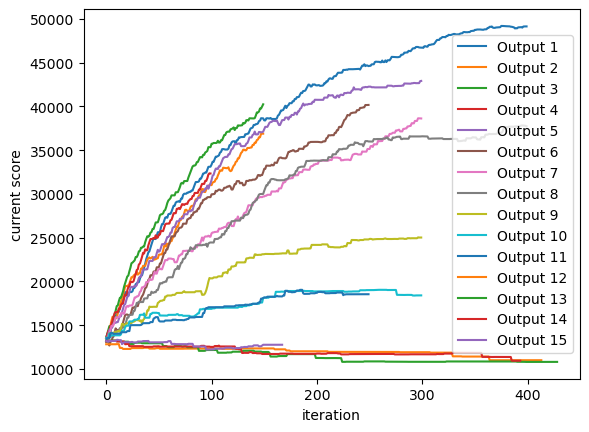

In [49]:
for idx, output in enumerate(outputs):
    plt.plot(output["objective_trajectory"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()

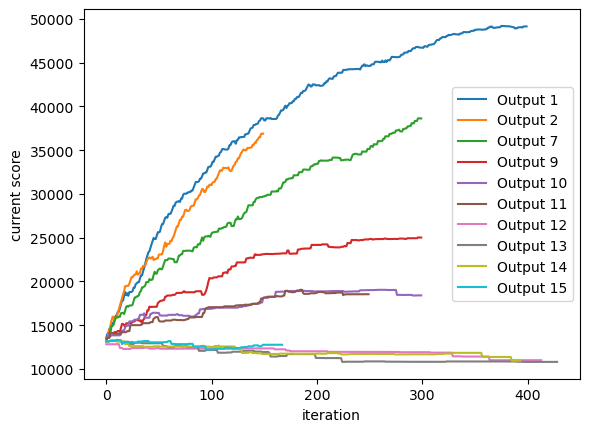

In [45]:
for idx, output in enumerate(outputs):
    if idx not in idx_to_plot:
        continue
    plt.plot(output["objective_trajectory"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()

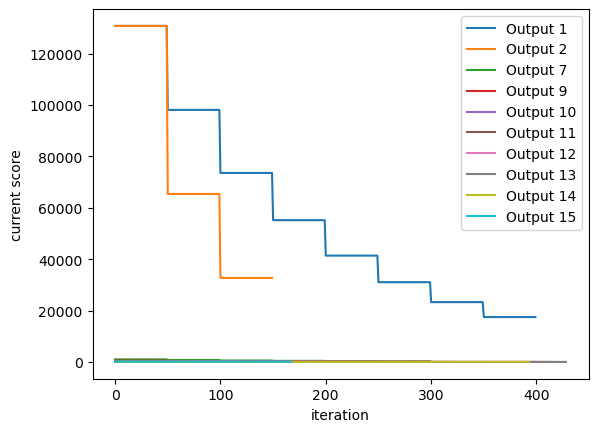

In [46]:
for idx, output in enumerate(outputs):
    if idx not in idx_to_plot:
        continue
    plt.plot(output["temperature_trajectory"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()

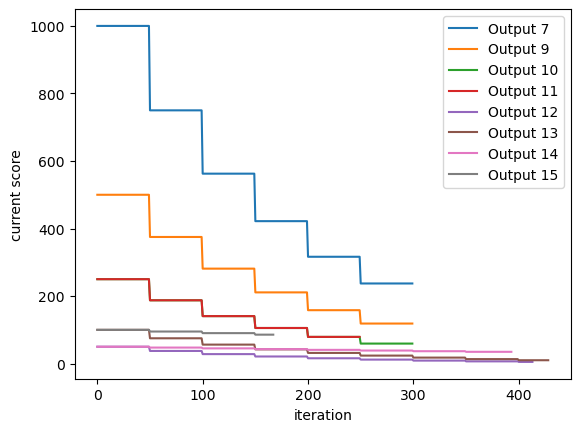

In [48]:
idx_to_plot2 = idx_to_plot = [6,8,9,10, 11,12, 13, 14]
for idx, output in enumerate(outputs):
    if idx not in idx_to_plot2:
        continue
    plt.plot(output["temperature_trajectory"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()

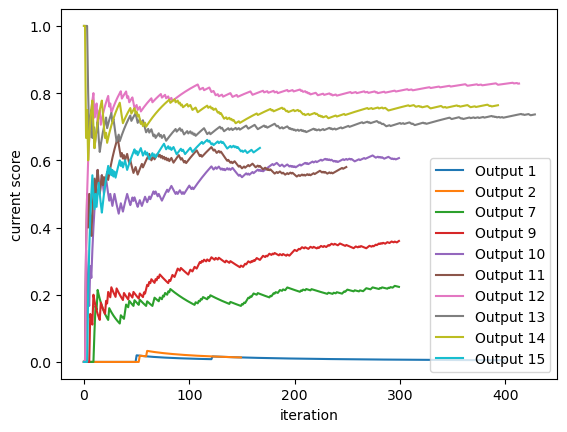

In [47]:
for idx, output in enumerate(outputs):
    if idx not in idx_to_plot:
        continue
    plt.plot(output["rejection_rate"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()

# test instance to determine  initial temperature

In [30]:
#problem_instance = "inst_tuning\heur040_n_300_m_13358"
instance_type = "test_instances/" #"inst_competition/" #"inst_tuning/" # 
problem_instance = "heur003_n_120_m_2588" #"heur040_n_300_m_13358" #"heur001_n_10_m_31" 
path = "data/"+instance_type + problem_instance +".txt"

In [31]:
problem = Problem(path)
metadata = pd.read_csv(path, sep=" ", nrows=1, header=None).iloc[0]
n = metadata.iloc[1]
m = metadata.iloc[2]
inital_solution = problem.get_heuristic_solution()
inital_solution.get_weight()

start
76.78 seconds


6069

In [32]:
frac_nodes = int(n/3)
frac_edges = int(m*0.006)
frac_nodes
frac_edges

15

In [33]:
# Define parameter values for tuning
params_to_try = [
    {'equilibrium': 50, 'cooling': 0.75, 'T_init': frac_nodes, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5},
    {'equilibrium': 50, 'cooling': 0.75, 'T_init': frac_edges, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
]

# Store outputs for different parameter combinations
outputs_test = []

for params in params_to_try:
    print("trying parameters\nequilibrium: ", params['equilibrium'], ", cooling: ", params["cooling"],
         ", T_init: ", params["T_init"], ", stopping_criteria: ", params["stopping_criteria"], 
          ", T_fin_frac: ", params["T_fin_frac"],", tau: ", params["tau"])
    start_time = time.time()
    sol, obj_traj, temp_traj, rej_traj = SA(inital_solution, 
                                            equilibrium = params['equilibrium'], 
                                            cooling = params['cooling'],
                                           T_init = params["T_init"],
                                           stopping_criteria = params["stopping_criteria"],
                                           T_fin_frac = params["T_fin_frac"],
                                           tau = params["tau"])
    # calculate rejection rate
    cumulative_sum = np.cumsum(rej_traj)
    time_steps = np.arange(1, len(rej_traj) + 1)
    rej_rate = cumulative_sum / time_steps
    
    output = {
        'solution': sol,
        'score': sol.get_weight(),
        'objective_trajectory': obj_traj,
        'temperature_trajectory': temp_traj,
        'rejection_trajectory': rej_traj,
        'rejection_rate': rej_rate,
        'parameters': params,
        'runtime': time.time()-start_time
    }
    outputs_test.append(output)

trying parameters
equilibrium:  50 , cooling:  0.75 , T_init:  40 , stopping_criteria:  noImprovement , T_fin_frac:  4 , tau:  5
T: 40
tmp changes since last improvment: 0
T: 30.0
tmp changes since last improvment: 1
T: 22.5
tmp changes since last improvment: 2
T: 16.875
tmp changes since last improvment: 3
T: 12.65625
tmp changes since last improvment: 4
T: 9.4921875
tmp changes since last improvment: 5
trying parameters
equilibrium:  50 , cooling:  0.75 , T_init:  15 , stopping_criteria:  noImprovement , T_fin_frac:  4 , tau:  5
T: 15
tmp changes since last improvment: 0
T: 11.25
tmp changes since last improvment: 1
T: 8.4375
tmp changes since last improvment: 2
T: 6.328125
tmp changes since last improvment: 3
T: 4.74609375
tmp changes since last improvment: 4
T: 3.5595703125
tmp changes since last improvment: 5


In [35]:
for idx, output in enumerate(outputs_test):
    print(f"Output {idx + 1}:")
    print("Parameters:", output['parameters'])
    print("Score:", output['score'])
    print("runtime:", output['runtime'])
    print("-----------")

Output 1:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 40, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 6069
runtime: 264.4272446632385
-----------
Output 2:
Parameters: {'equilibrium': 50, 'cooling': 0.75, 'T_init': 15, 'stopping_criteria': 'noImprovement', 'T_fin_frac': 4, 'tau': 5}
Score: 6069
runtime: 269.91273641586304
-----------


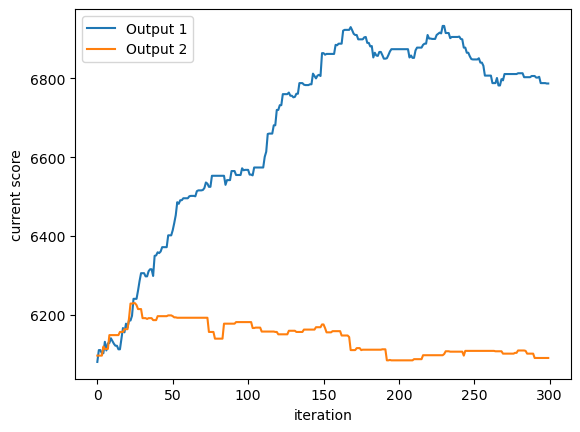

In [36]:
for idx, output in enumerate(outputs_test):
    plt.plot(output["objective_trajectory"], label = f'Output {idx+1}')
# Add labels and legend
plt.xlabel('iteration')
plt.ylabel('current score')
plt.legend()
plt.show()